In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Shovin\Downloads\archive (3)\AQI and Lat Long of Countries.csv")

# Initial inspection
print("Data Head:")
print(df.head())





Data Head:
              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2              Brazil  Presidente Dutra         41         Good             1   
3               Italy   Priolo Gargallo         66     Moderate             1   
4              Poland         Przasnysz         34         Good             1   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category      lat      

In [4]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB
None


In [5]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  16695.000000  16695.000000     16695.000000   16695.000000   
mean      62.998682      1.342138        31.767355       3.819647   
std       43.091971      2.371379        22.839343       5.880677   
min        7.000000      0.000000         0.000000       0.000000   
25%       38.500000      1.000000        20.000000       0.000000   
50%       52.000000      1.000000        29.000000       2.000000   
75%       69.000000      1.000000        38.000000       5.000000   
max      500.000000    133.000000       222.000000      91.000000   

       PM2.5 AQI Value           lat           lng  
count     16695.000000  16695.000000  16695.000000  
mean         59.821324     30.267148     -3.944485  
std          43.208298     22.947398     73.037148  
min           0.000000    -54.801900   -171.750000  
25%          34.000000     16.515450    -75.180000  
50%          52.000000     38.81580

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64


In [8]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


 # 1. Distribution of AQI Categories

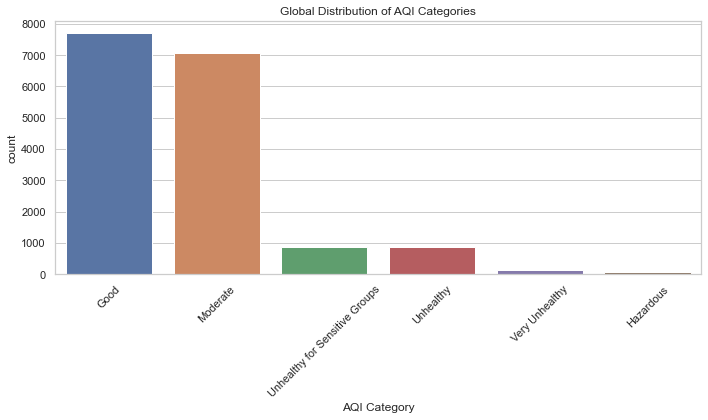

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 6))
order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
sns.countplot(data=df, x='AQI Category', order=[cat for cat in order if cat in df['AQI Category'].unique()])
plt.title('Global Distribution of AQI Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('aqi_category_dist.png')

 # 2. Top 10 Countries with highest Average AQI

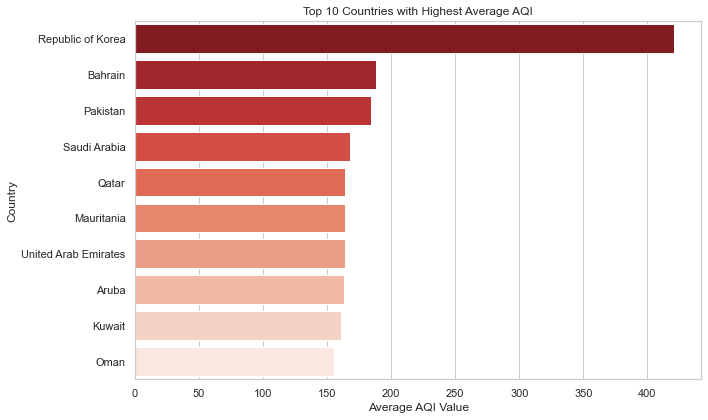

In [10]:
top_10_polluted_countries = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_polluted_countries.values, y=top_10_polluted_countries.index, palette='Reds_r')
plt.title('Top 10 Countries with Highest Average AQI')
plt.xlabel('Average AQI Value')
plt.tight_layout()
plt.savefig('top_10_polluted_countries.png')

# 3. Correlation Heatmap

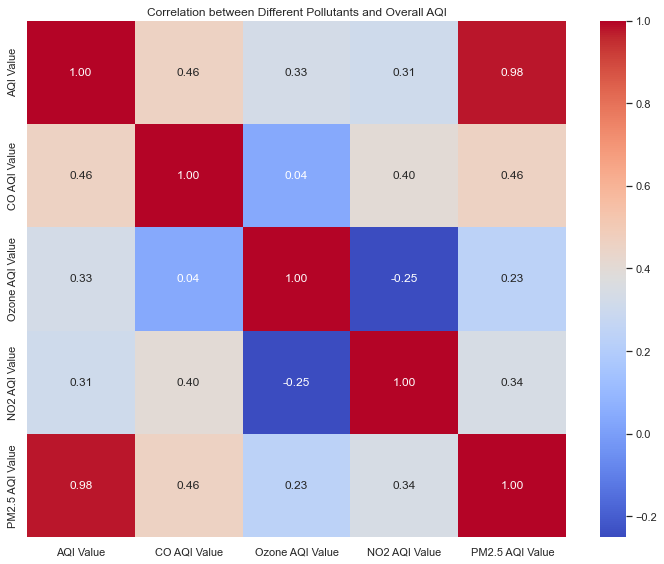

In [11]:
plt.figure(figsize=(10, 8))
corr = df[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Different Pollutants and Overall AQI')
plt.tight_layout()
plt.savefig('pollutant_correlation.png')

# 4. Latitude vs AQI

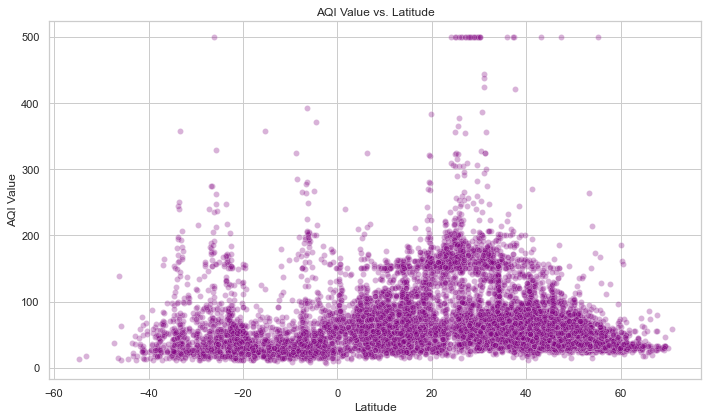

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lat', y='AQI Value', alpha=0.3, color='purple')
plt.title('AQI Value vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('AQI Value')
plt.tight_layout()
plt.savefig('lat_vs_aqi.png')

# Summary of categories count for text response

In [13]:
category_counts = df['AQI Category'].value_counts()
print("\nAQI Category Counts:")
print(category_counts)


AQI Category Counts:
Good                              7708
Moderate                          7054
Unhealthy                          871
Unhealthy for Sensitive Groups     869
Very Unhealthy                     131
Hazardous                           62
Name: AQI Category, dtype: int64


# 5. Boxplot of AQI Values by Category

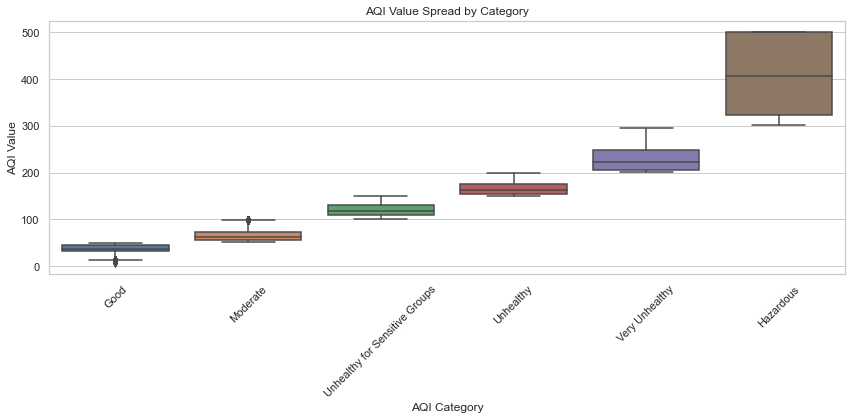

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='AQI Category', y='AQI Value', order=order)
plt.title('AQI Value Spread by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('aqi_boxplot.png')

# 6. Scatter plot: PM2.5 vs AQI

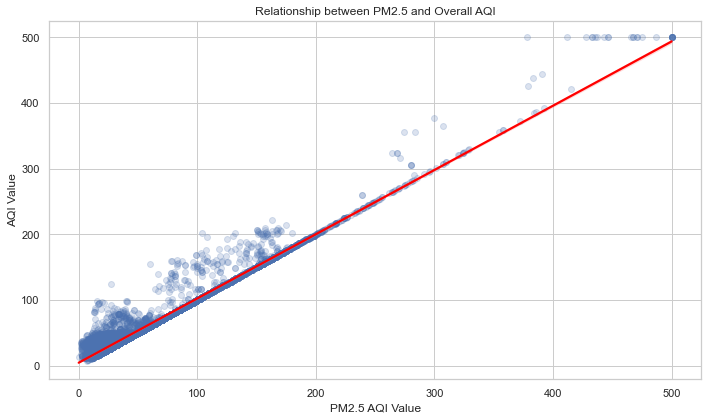

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='PM2.5 AQI Value', y='AQI Value', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Relationship between PM2.5 and Overall AQI')
plt.tight_layout()
plt.savefig('pm25_vs_aqi.png')

# 7. Top 5 countries by city count - comparison

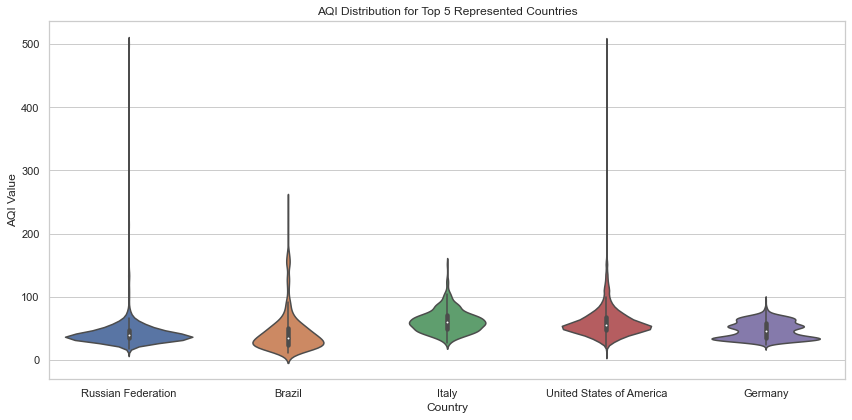

In [18]:

df_top_countries = df[df['Country'].isin(top_countries)]
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top_countries, x='Country', y='AQI Value')
plt.title('AQI Distribution for Top 5 Represented Countries')
plt.tight_layout()
plt.savefig('top_countries_violin.png')

# 8. Average Pollutant Values Comparison

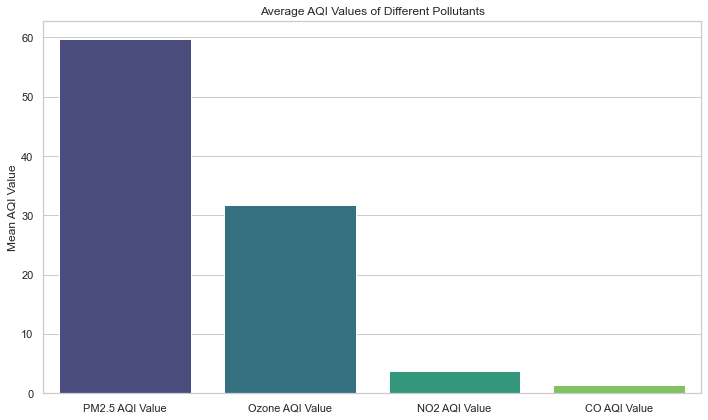

In [17]:
pollutants = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
avg_pollutants = df[pollutants].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_pollutants.index, y=avg_pollutants.values, palette='viridis')
plt.title('Average AQI Values of Different Pollutants')
plt.ylabel('Mean AQI Value')
plt.tight_layout()
plt.savefig('avg_pollutants.png')

# 9. Geospatial distribution (Pseudo-map)

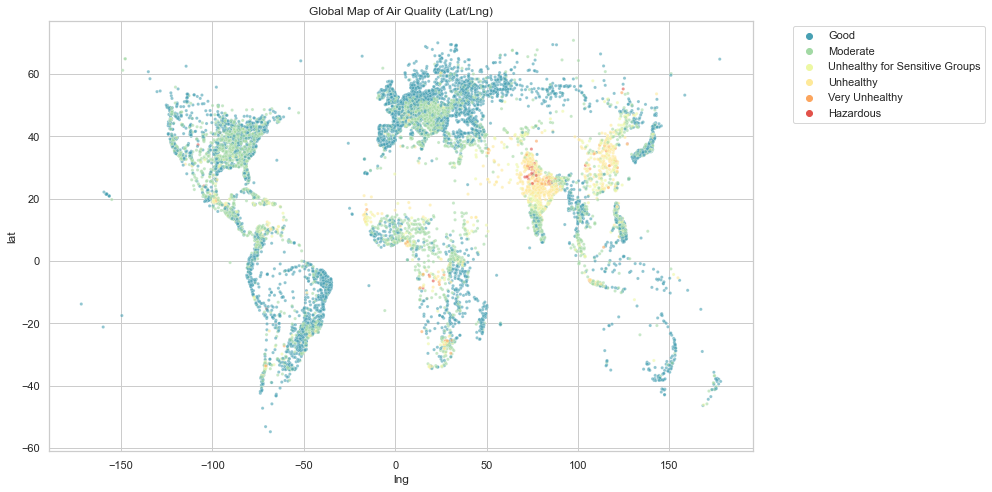

In [19]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='lng', y='lat', hue='AQI Category', 
                hue_order=order, palette='Spectral_r', alpha=0.6, s=10)
plt.title('Global Map of Air Quality (Lat/Lng)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.savefig('global_aqi_map.png')

# 10. Ozone vs NO2

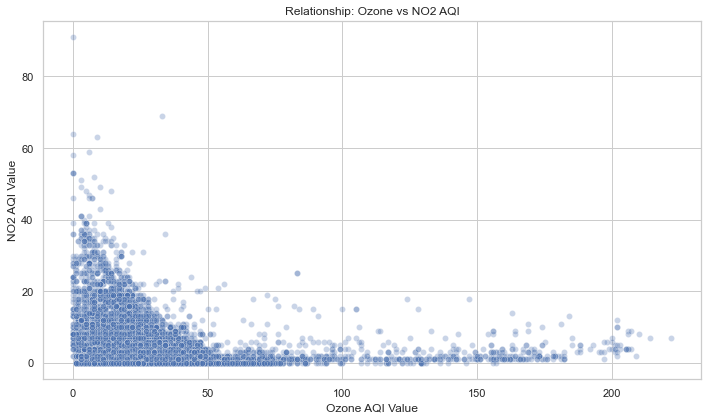

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ozone AQI Value', y='NO2 AQI Value', alpha=0.3)
plt.title('Relationship: Ozone vs NO2 AQI')
plt.tight_layout()
plt.savefig('ozone_vs_no2.png')

# Calculate the mean of each pollutant for each AQI Category

<Figure size 864x432 with 0 Axes>

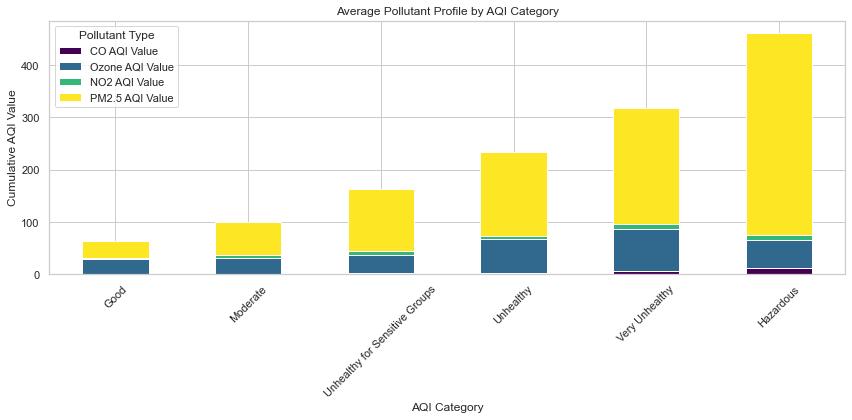

In [23]:
pollutants = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
category_profiles = df.groupby('AQI Category')[pollutants].mean()
order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
category_profiles = category_profiles.reindex(order)

plt.figure(figsize=(12, 6))
category_profiles.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Average Pollutant Profile by AQI Category')
plt.ylabel('Cumulative AQI Value')
plt.xticks(rotation=45)
plt.legend(title='Pollutant Type')
plt.tight_layout()
plt.savefig('pollutant_profile_stacked.png')

# Latitudinal Bands Analysis

Text(0.5, 1.0, 'AQI Distribution by Latitude')

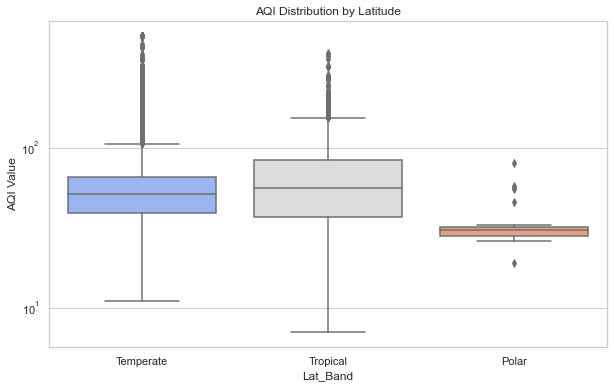

In [25]:
def get_lat_band(lat):
    if abs(lat) <= 23.5:
        return 'Tropical'
    elif abs(lat) <= 66.5:
        return 'Temperate'
    else:
        return 'Polar'

df['Lat_Band'] = df['lat'].apply(get_lat_band)
lat_band_stats = df.groupby('Lat_Band')['AQI Value'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Lat_Band', y='AQI Value', palette='coolwarm')
plt.yscale('log') # Log scale to see variations better
plt.title('AQI Distribution by Latitude')

# AQI Variance by Country (Top 10 most "Variable" countries)

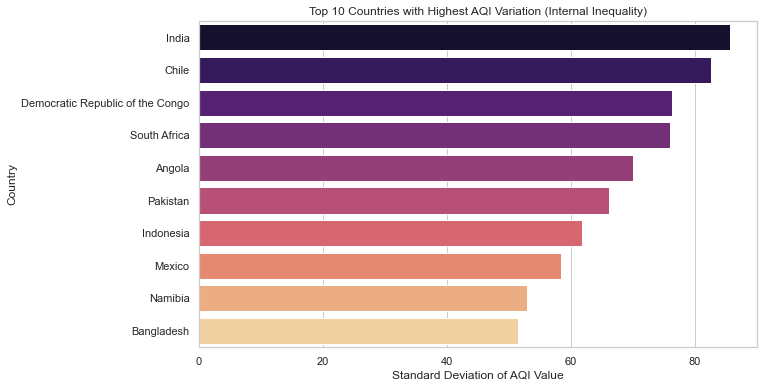

In [26]:
country_variance = df.groupby('Country')['AQI Value'].std().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_variance.values, y=country_variance.index, palette='magma')
plt.title('Top 10 Countries with Highest AQI Variation (Internal Inequality)')
plt.xlabel('Standard Deviation of AQI Value')
plt.savefig('country_variance.png')

# Dominant Pollutant Frequency

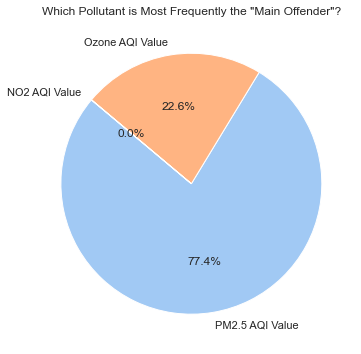

In [27]:
df['Main_Offender'] = df[pollutants].idxmax(axis=1)
offender_counts = df['Main_Offender'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(offender_counts, labels=offender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Which Pollutant is Most Frequently the "Main Offender"?')
plt.savefig('main_offender_pie.png')

# Longitude vs AQI (East vs West)

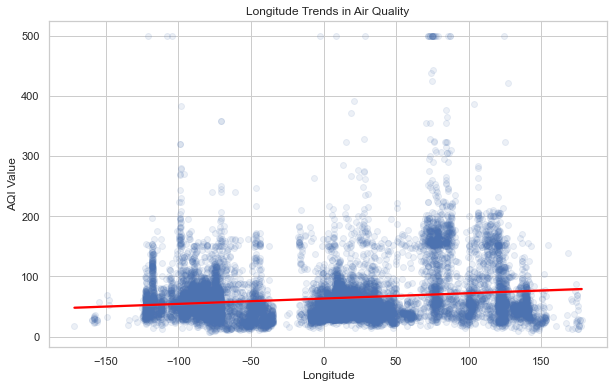

In [28]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='lng', y='AQI Value', scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title('Longitude Trends in Air Quality')
plt.xlabel('Longitude')
plt.ylabel('AQI Value')
plt.savefig('longitude_trend.png')

In [1]:
pip install streamlit pandas plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
streamlit run app.py

SyntaxError: invalid syntax (Temp/ipykernel_13012/3737097518.py, line 1)